# Stock Market Prediction using Decision Tree

In this notebook I take a look at stock market prediction using decision tree and linear regression.

# Importing Libraries

In [1]:
# Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data

In [2]:
# Using data from Apple's stock.
df = pd.read_csv('../input/sandp500/individual_stocks_5yr/individual_stocks_5yr/AAPL_data.csv') 

In [3]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [5]:
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


In [6]:
df.shape

(1259, 7)

# EDA

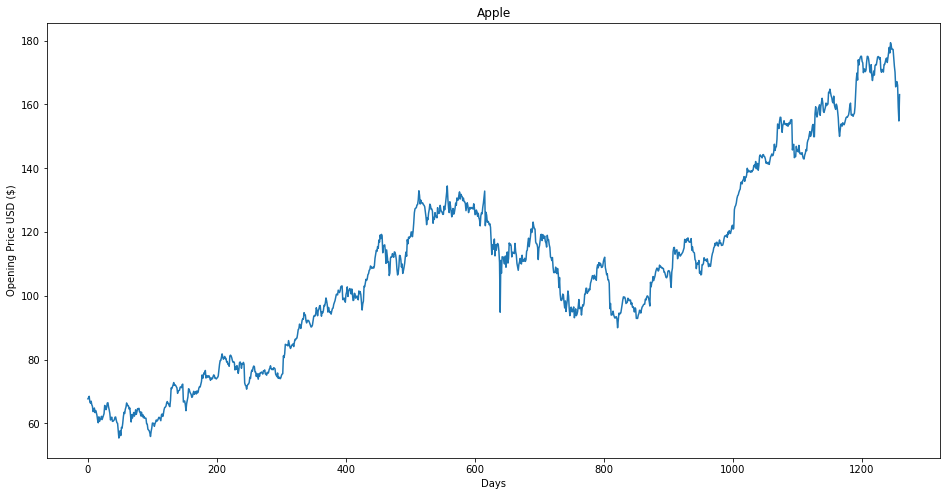

In [7]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['open'])
plt.show()

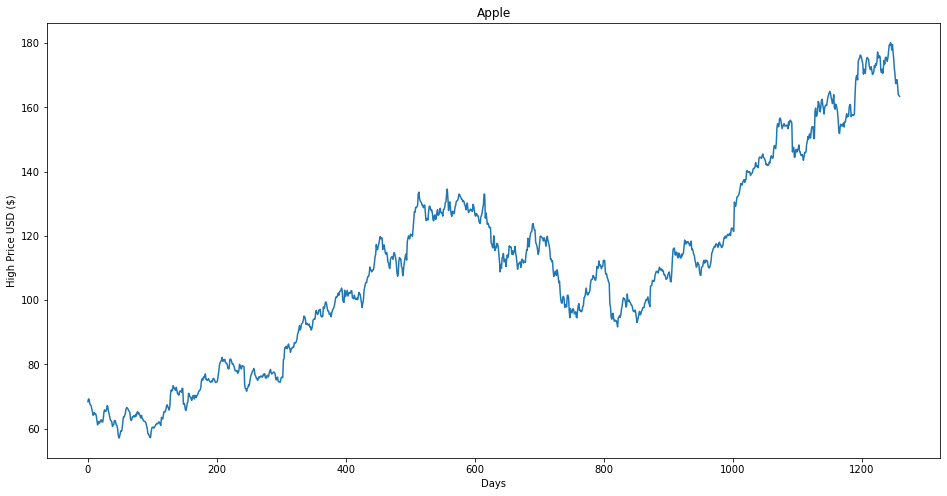

In [8]:
# Visualizing the high prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['high'])
plt.show()

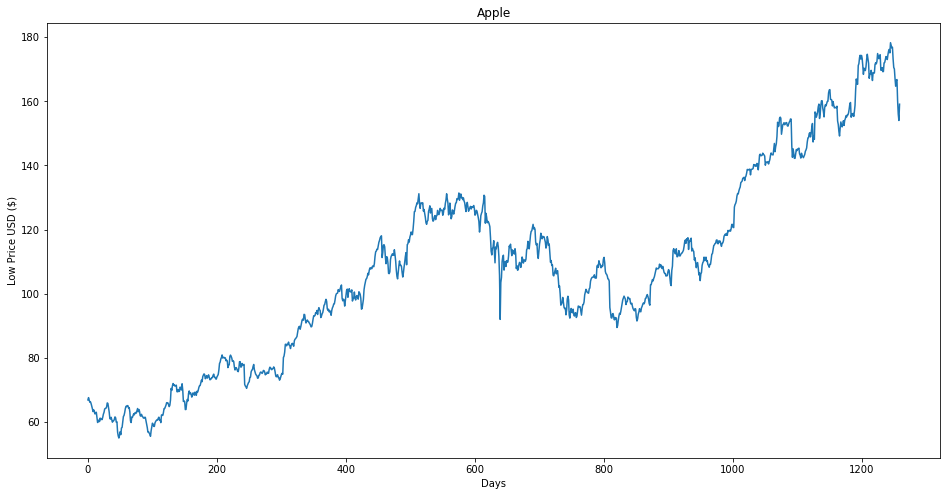

In [9]:
# Visualizing the low prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['low'])
plt.show()

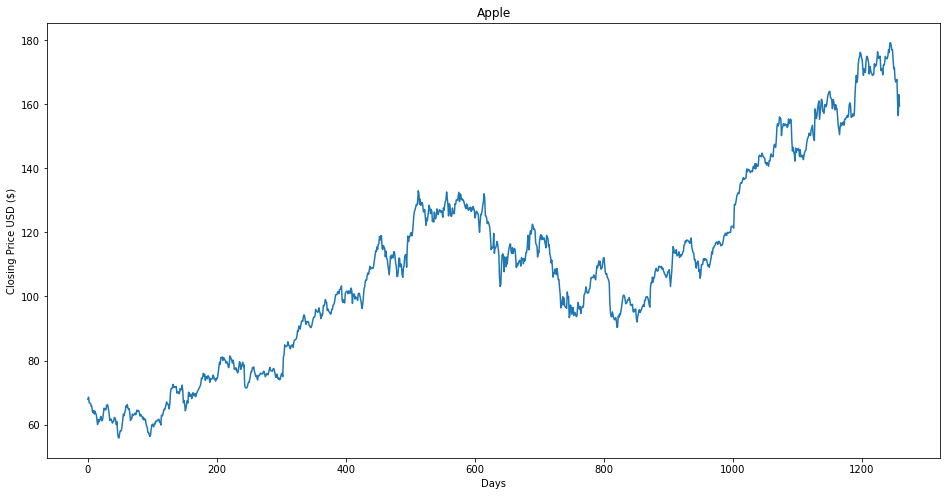

In [10]:
# Visualizing the closing prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['close'])
plt.show()

In [11]:
df2 = df['close']

In [12]:
df2.tail()

1254    167.78
1255    160.50
1256    156.49
1257    163.03
1258    159.54
Name: close, dtype: float64

In [13]:
df2 = pd.DataFrame(df2)     

In [14]:
df2.tail()

,close
1254,167.78
1255,160.50
1256,156.49
1257,163.03
1258,159.54


In [15]:
# Prediction 100 days into the future.
future_days = 100
df2['Prediction'] = df2['close'].shift(-future_days)

In [16]:
df2.tail()

,close,Prediction
1254,167.78,NaN
1255,160.50,NaN
1256,156.49,NaN
1257,163.03,NaN
1258,159.54,NaN


In [17]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 67.8542]
 [ 68.5614]
 [ 66.8428]
 ...
 [160.86  ]
 [159.65  ]
 [158.28  ]]


In [18]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[ 60.1142  59.6314  59.2928 ... 156.49   163.03   159.54  ]


# Linear and Decision Tree Regression

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [21]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [22]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[144.53],
       [143.68],
       [143.79],
       [143.65],
       [146.58],
       [147.51],
       [147.06],
       [146.53],
       [148.96],
       [153.01],
       [153.99],
       [153.26],
       [153.95],
       [156.1 ],
       [155.7 ],
       [155.47],
       [150.25],
       [152.54],
       [153.06],
       [153.99],
       [153.8 ],
       [153.34],
       [153.87],
       [153.61],
       [153.67],
       [152.76],
       [153.18],
       [155.45],
       [153.93],
       [154.45],
       [155.37],
       [154.99],
       [148.98],
       [145.42],
       [146.59],
       [145.16],
       [144.29],
       [142.27],
       [146.34],
       [145.01],
       [145.87],
       [145.63],
       [146.28],
       [145.82],
       [143.73],
       [145.83],
       [143.68],
       [144.02],
       [143.5 ],
       [144.09],
       [142.73],
       [144.18],
       [145.06],
       [145.53],
       [145.74],
       [147.77],
       [149.04],
       [149.56],
       [150.08

In [23]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[159.88  164.325 158.73  156.07  168.11  169.8   150.55  153.14  154.23
 153.28  154.12  156.17  156.41  170.6   155.39  157.1   155.84  155.9
 153.28  154.12  156.99  159.88  160.47  159.76  159.76  156.25  156.17
 157.1   156.41  157.41  163.05  166.72  169.04  171.85  168.11  169.48
 174.25  174.81  171.34  175.88  174.67  173.97  171.34  169.08  171.1
 170.15  164.325 173.14  174.96  174.97  174.09  173.07  169.48  171.85
 171.05  169.8   169.64  174.54  169.32  169.37  172.67  155.84  172.27
 172.22  173.97  176.42  174.54  154.23  175.01  175.01  170.57  170.6
 171.08  169.23  172.26  172.23  173.03  175.    174.35  174.33  175.28
 175.28  177.09  175.    179.1   179.26  178.46  177.    177.04  174.22
 171.51  171.51  167.96  166.97  167.43  167.78  177.    156.49  163.03
 159.54 ]


In [24]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[151.97812287 151.16671448 151.27172027 151.13807654 153.93504899
 154.82282523 154.39325609 153.88731909 156.20699249 160.07311483
 161.00862097 160.31176435 160.97043705 163.02282298 162.64098374
 162.42142617 157.43842405 159.62445372 160.12084473 161.00862097
 160.82724733 160.3881322  160.8940692  160.64587369 160.70314958
 159.8344653  160.23539651 162.40233421 160.95134509 161.4477361
 162.32596636 161.96321908 156.22608445 152.82771519 153.94459497
 152.57951968 151.74901933 149.82073115 153.70594545 152.43632996
 153.25728434 153.02818079 153.64866956 153.20955443 151.21444439
 153.21910041 151.16671448 151.49127784 150.99488682 151.55809971
 150.25984628 151.64401353 152.48405987 152.93272098 153.13318658
 155.07102074 156.28336034 156.77975135 157.27614237 158.17346459
 157.52433788 157.45751601 159.19488457 159.81537334 160.50268398
 157.73434946 156.72247547 155.98743493 165.39977227 164.01560501
 162.51688598 163.29965643 165.60978385 166.82212345 167.7576296
 162.2782364

In [25]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


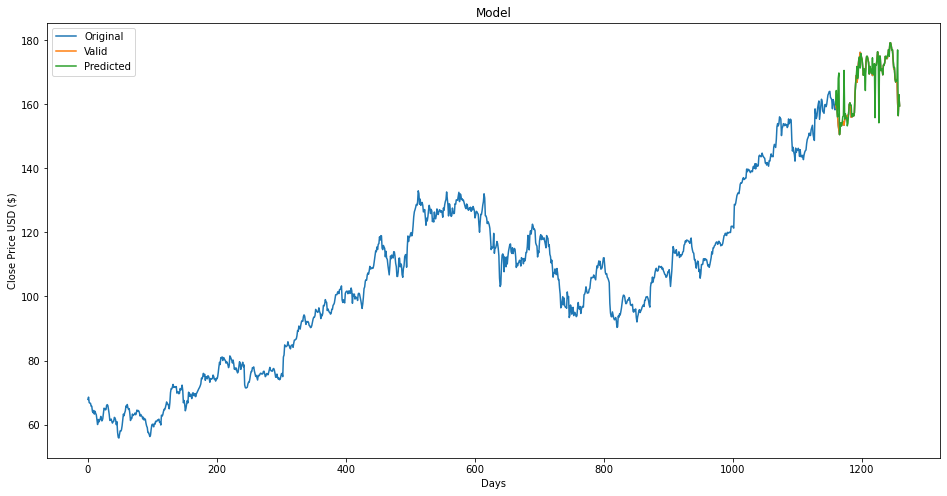

In [26]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()